# Proyek Analisis Data: Bike Sharing Dataset



**Nama:** Zhafirah Izzatulrahmah Putri

**Email:** m200d4kx1682@bangkit.academy

**ID Dicoding:** zhafirahip

## Menentukan Pertanyaan Bisnis


*   Pertanyaan 1: What is the relationship between season and the number of daily bicycle rentals?
*   Pertanyaan 2: What is the relationship between average bicycle rentals based on weather and the number of bicycle rentals in a day?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Wrangling

### Gathering data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
day_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing data

### Menilai tabel `day_df`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Duplicated data: ", day_df.duplicated().sum())

Duplicated data:  0


there is no duplicated data

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Menilai tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Duplicated data: ", hour_df.duplicated().sum())

hour_df.describe()

Duplicated data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning data


In [ ]:
print("Duplicated data: ", day_df.duplicated().sum())
day_df.describe()
day_df.isna().sum()

Duplicated data:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Duplicated data: ", hour_df.duplicated().sum())
hour_df.describe()
hour_df.isna().sum()

Duplicated data:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Because there are no duplicates and missing values, there is no need to clean

## Explanatory Data Analysis (EDA)

### Explore `day_df`

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
323,324,2011-11-20,4,0,11,0,0,0,2,0.463333,0.457058,0.684583,0.185950,787,2733,3520
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058
345,346,2011-12-12,4,0,12,0,1,1,1,0.238333,0.270196,0.670833,0.063450,143,3167,3310
478,479,2012-04-23,2,1,4,0,1,1,2,0.321667,0.301125,0.766667,0.303496,195,3019,3214
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore `hour_df`

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6935,6936,2011-10-21,4,0,10,14,0,5,1,1,0.52,0.5000,0.42,0.2985,67,131,198
2241,2242,2011-04-08,2,0,4,6,0,5,1,2,0.34,0.3636,0.87,0.0000,2,33,35
14334,14335,2012-08-25,3,1,8,11,0,6,0,2,0.72,0.6818,0.62,0.2836,143,314,457
94,95,2011-01-05,1,0,1,2,0,3,1,1,0.16,0.1970,0.74,0.0896,0,2,2
5271,5272,2011-08-12,3,0,8,13,0,5,1,1,0.78,0.6818,0.29,0.0896,74,179,253


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Menggabungkan data `day_df` dan `hour_df`

#### Melakukan Rename

In [ ]:
day_df.rename(columns={'dteday':'date','yr':'year','mnth':'month',
                   'weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)

hour_df.rename(columns={'dteday':'date','yr':'year','mnth':'month',
                   'weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)
day_df.head()
hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data = day_df.merge(hour_df, on='date', how='inner', suffixes=('_daily', '_hourly'))
print(data.shape)
data.loc[new_df["date"].isnull()]
data

(17379, 32)


,instant_daily,date,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_situation_daily,temp_daily,...,weekday_hourly,workingday_hourly,weather_situation_hourly,temp_hourly,temp_feel_hourly,humidity_hourly,wind_speed_hourly,casual_hourly,registered_hourly,count_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
new_df = data.copy()

### Mengubah Dtype `date` dari object menjadi datetime

In [ ]:
datetime_columns = ["date"]

for column in datetime_columns:
  new_df[column] = pd.to_datetime(new_df[column])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant_daily             17379 non-null  int64         
 1   date                      17379 non-null  datetime64[ns]
 2   season_daily              17379 non-null  int64         
 3   year_daily                17379 non-null  int64         
 4   month_daily               17379 non-null  int64         
 5   holiday_daily             17379 non-null  int64         
 6   weekday_daily             17379 non-null  int64         
 7   workingday_daily          17379 non-null  int64         
 8   weather_situation_daily   17379 non-null  int64         
 9   temp_daily                17379 non-null  float64       
 10  temp_feel_daily           17379 non-null  float64       
 11  humidity_daily            17379 non-null  float64       
 12  wind_speed_daily  

### Memberikan labels

In [ ]:
season_labels = {
    1:'spring',
    2:'summer',
    3:'fall',
    4:'winter'
}
new_df['season_daily'] = new_df['season_daily'].map(season_labels)
new_df['season_hourly'] = new_df['season_hourly'].map(season_labels)

year_labels = {
    0:"2017",
    1:"2018",
}
new_df['year_daily'] = new_df['year_daily'].map(year_labels)
new_df['year_hourly'] = new_df['year_hourly'].map(year_labels)

month_labels = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'June',
    7:'July',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
new_df['month_daily'] = new_df['month_daily'].map(month_labels)
new_df['month_hourly'] = new_df['month_hourly'].map(month_labels)

weekday_labels = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
new_df['weekday_hourly'] = new_df['weekday_hourly'].map(weekday_labels)
new_df['weekday_daily'] = new_df['weekday_daily'].map(weekday_labels)

weather_labels = {
    1: 'Clear',
    2: 'Mist',
    3: 'Heavy Rain'
}

new_df['weather_situation_daily'] = new_df['weather_situation_daily'].map(weather_labels)
new_df['weather_situation_hourly'] = new_df['weather_situation_hourly'].map(weather_labels)

holiday_labels = {
    0: 'No',
    1: 'Yes'
}
new_df['holiday_daily'] = new_df['holiday_daily'].map(holiday_labels)
new_df['holiday_hourly'] = new_df['holiday_hourly'].map(holiday_labels)

workingday_labels = {
    0: 'No',
    1: 'Yes'
}
new_df['workingday_daily'] = new_df['workingday_daily'].map(workingday_labels)
new_df['workingday_hourly'] = new_df['workingday_hourly'].map(workingday_labels)


In [ ]:
new_df.season_daily.value_counts()

fall      4496
summer    4409
spring    4242
winter    4232
Name: season_daily, dtype: int64

In [ ]:
new_df.year_daily.value_counts()

2018    8734
2017    8645
Name: year_daily, dtype: int64

In [ ]:
new_df.month_daily.value_counts()

May     1488
July    1488
Dec     1483
Aug     1475
Mar     1473
Oct     1451
June    1440
Apr     1437
Sep     1437
Nov     1437
Jan     1429
Feb     1341
Name: month_daily, dtype: int64

In [ ]:
new_df.weekday_hourly.value_counts()

Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday_hourly, dtype: int64

In [ ]:
new_df.weather_situation_daily.value_counts()

Clear         11040
Mist           5871
Heavy Rain      468
Name: weather_situation_daily, dtype: int64

In [ ]:
new_df.head()

,instant_daily,date,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_situation_daily,temp_daily,...,weekday_hourly,workingday_hourly,weather_situation_hourly,temp_hourly,temp_feel_hourly,humidity_hourly,wind_speed_hourly,casual_hourly,registered_hourly,count_hourly
0,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1

What is the relationship between season and the number of daily bicycle rentals?

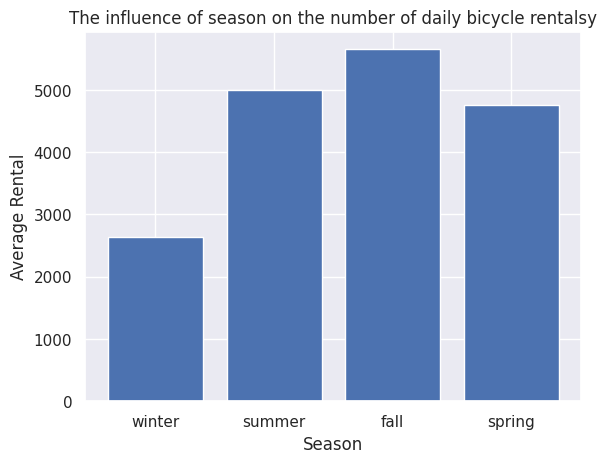

In [ ]:
new_df = pd.DataFrame(data)
seasonal_data = new_df.groupby('season_daily')['count_daily'].mean()
season_names = ['winter', 'summer', 'fall', 'spring']
plt.bar(season_names, seasonal_data)
plt.title('The influence of season on the number of daily bicycle rentalsy')
plt.xlabel('Season')
plt.ylabel('Average Rental')
plt.show()

The highest number of bicycle renters can be seen when the season is fall and the lowest when the season is winter.

### Pertanyaan 2

What is the relationship between average bicycle rentals based on weather and the number of bicycle rentals in a day?

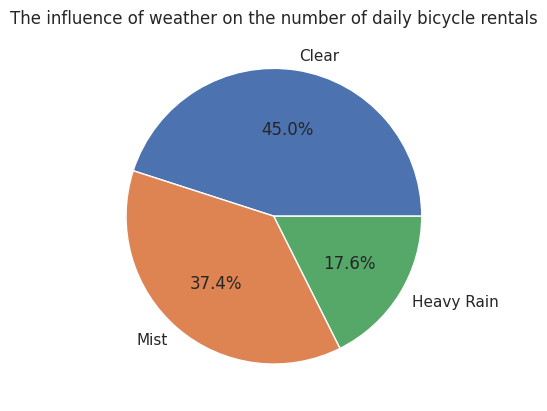

In [ ]:
new_df = pd.DataFrame(data)
weather_data = new_df.groupby('weather_situation_daily')['count_daily'].mean()
weather_names = ['Clear','Mist','Heavy Rain']
plt.pie(weather_data, labels=weather_names, autopct="%1.1f%%")
plt.title('The influence of weather on the number of daily bicycle rentals')
plt.show()

Based on the pie chart, it can be seen that in the clear weather the number of bicycle renters is the highest and the least in heavy rain.

# Conclusion



1.   What is the relationship between season and the number of daily bicycle rentals?
Dapat dilihat bahwa adanya perbedaan musim dapat mempengaruhi para calon penyewa untuk melakukan penyewaan sepeda. Berdasarkan grafik diketahui bahwa saat musim fall banyak orang yang menyewa sepeda sedangkan paling sedikit saat musim winter. Hal ini disebabkan karena musim winter biasanya jalanan akan tertutupi oleh salju dan memiliki suhu yang sangat rendah sehingga orang-orang memilih untuk berada di dalam rumah. Sebaliknya saat musim fall, orang-orang akan memilih untuk pergi keluar rumah sambil bermain sepeda. Maka dari itu, jika ingin melakukan promosi untuk penyewaan sepeda dapat dilakukan saat musim fall, summer, dan spring karena akan banyak penyewa yang berminat untuk menyewa sepeda.
2. What is the relationship between average bicycle rentals based on weather and the number of bicycle rentals in a day?  
Berdasarkan pie chart terlihat bahwa selain musim, cuaca juga dapat mempengaruhi para calon penyewa untuk menyewa sepeda. Cuaca clear adalah waktu terbaik untuk bermain serta menggunakan sepeda diluar rumah, lalu dilanjut saat mist, dan terakhir saat hujan. Namun perbedaan penyewa saat cuaca clear dan mist tidak begitu signifikan jumlah perbedaan penyewa sepeda. Maka dapat disimpulkan bahwa waktu terbaik saat ingin mendapatkan penyewa sepeda yaitu pada cuaca clear dan mist.

